# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [16]:
%%R

library(tidyverse)

In [17]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

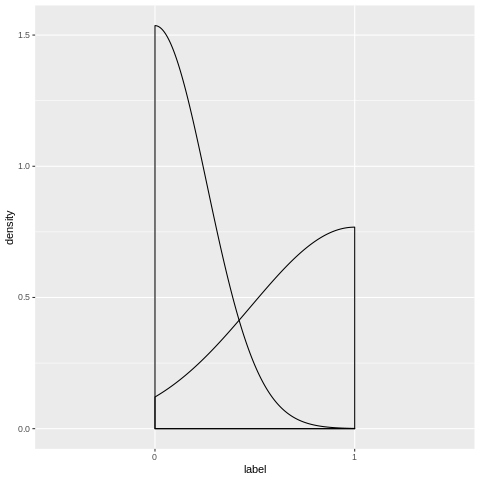

In [4]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: Don't forget to make sure the labels are factors!
# hint hint: Read the errors carefully! 
# Read the documentation for parse_factor (readr) if confused!
dat$label <- as.factor(dat$label)

p <- ggplot(dat, aes(x = label)) + geom_density()
p

# Problem 2: Using Classes in Python

In this problem, you will use the classes in the following cell. **You do not need to modify the classes or touch the code in the following cell in any way!**

In [5]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [6]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [7]:
import random
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)

random.shuffle(dat)

In [8]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [9]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data
#random.sample
#mask = pd.Series(range(1000))
#random.shuffle(mask)
#mask_train = mask < 700
#mask_test = mask > 699

train = dat[:300]
test = dat[300:]
print(test)
len(train), len(test)

[[1.710564728963808, 0], [1.5457267163245665, 0], [0.0033710724898665667, 0], [1.5900807874652934, 1], [1.1955001221099024, 0], [2.0171680284808553, 1], [-0.8519531057850414, 1], [1.2257420306482834, 0], [0.4638960512010686, 1], [1.6938670557932882, 1], [4.612395316548438, 1], [3.026685717212092, 0], [0.6568636752887917, 0], [4.21585514134166, 0], [-0.2815325714130683, 0], [0.5976636847751262, 1], [3.6237891517425647, 0], [6.839335518138163, 0], [-8.544669134974075, 1], [-7.683117159761189, 1], [-2.222602998691227, 1], [-0.3272984310753201, 1], [3.0059695319764064, 1], [-1.164068138103106, 1], [-2.659211495289163, 1], [1.6876002946126785, 1], [-1.3497184860279954, 0], [-0.31905249235557953, 1], [2.037146236535045, 1], [6.415676624917036, 0], [-0.26884042122577956, 0], [1.7730668180404086, 0], [-3.5002654927838464, 1], [3.1026722935721223, 1], [0.05176882532535254, 0], [1.3669482924503906, 0], [-0.6987064338631228, 0], [0.47933707613515786, 1], [1.3611860130036586, 0], [-0.9246310557712

(300, 700)

In [15]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.
train_x = []
train_label = []
test_x = []
test_label = []
    
for n in train:
    train_x += [n[0]]
    train_label += [n[1]]

for n in test:
    test_x += [n[0]]
    test_label += [n[1]]  
    
len(train_x), len(train_label), len(test_x), len(test_label)

(300, 300, 700, 700)

## Problem 2.3: Testing models!

In [12]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label
KNN_predicted = []
KFN_predicted = []
KNN_evaluat = []
KFN_evaluat = []
#1
KNN = KNearestNeighbors(K=5)
KFN = KFurthestNeighbors(K=5)
#2
KNN.fit(train_x, train_label)
KFN.fit(train_x, train_label)
#3
#A
for x in test_x:
    KNN_predicted += [KNN.predict(x)]
    KFN_predicted += [KFN.predict(x)]
#B
for i in range(0, 700):
    KNN_evaluat += [KNN_predicted[i] == test_label[i]]
    KFN_evaluat += [KFN_predicted[i] == test_label[i]]

print(KNN_evaluat)
len(KNN_predicted)

[True, True, True, False, True, False, True, True, False, False, False, True, False, True, False, True, True, True, True, True, True, True, False, False, True, False, False, True, False, True, False, False, True, False, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, False, True, False, False, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, True, True, False, True, False, True, False, False, False, False, True, True, False, False, True, False, False, False, False, False, True, False, True, False, True, True, True, True, True, False, True, True, True, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, False, Tr

700

In [13]:
# Compare the two classes of models!

KNN_sum = 0
for num in KNN_evaluat:
    if num == True:
        KNN_sum += 1

KFN_sum = 0
for num in KFN_evaluat:
    if num == True:
        KFN_sum += 1

if KNN_sum > KFN_sum:
    print("KNN model performed better than the KFN model")
else:
    print("KFN model performed better than the KNN model")

KNN model performed better than the KFN model
